<h1 style="text-align: center;">Image Classification-CNN-CIFAR_10 Data</h1>

<img src="https://samyzaf.com/ML/cifar10/cifar1.jpg">

In this project, an image classification model has been developed using the CIFAR-10 dataset. The aim is to accurately identify 10 different object classes using a Convolutional Neural Network (CNN) architecture.

Dataset: https://www.kaggle.com/competitions/cifar-10

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  #The dataset has been loaded.

In [3]:
x_train.shape

(50000, 32, 32, 3)

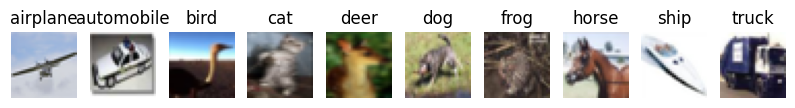

In [4]:
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = 10
samples_per_class = 1
plt.figure(figsize=(10, 10))

for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

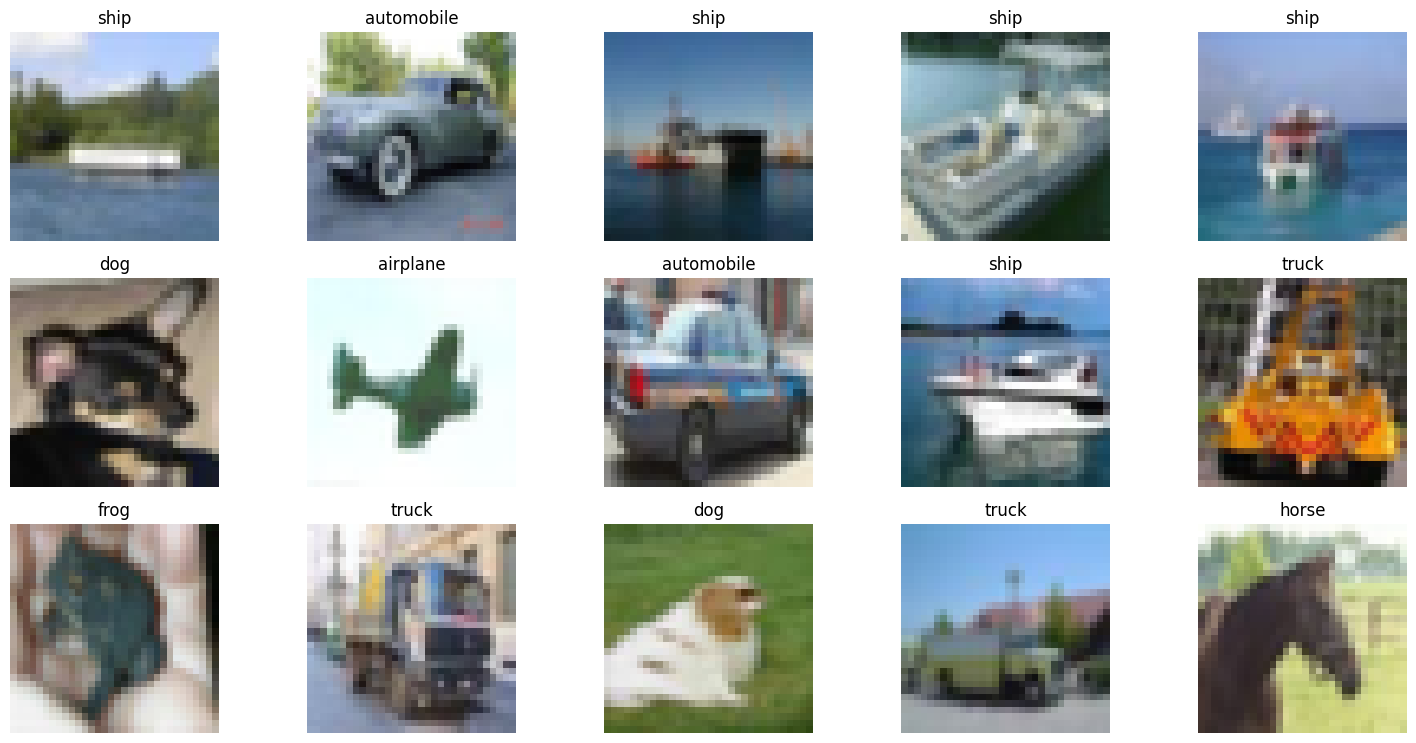

In [5]:
num_samples = 15
random_idxs = np.random.choice(x_train.shape[0], num_samples, replace=False)
random_images = x_train[random_idxs]
random_labels = y_train[random_idxs]

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(4, 5, i + 1)
    plt.imshow(random_images[i].astype('uint8'))
    plt.axis('off')
    plt.title(class_names[random_labels[i][0]])

plt.tight_layout()
plt.show()


In [6]:
y_train[0]

array([6], dtype=uint8)

Each pixel has a value between 0 and 255. With this code, we assigned all pixels a value between 0 and 1 and normalized them.

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
x_train=np.array(x_train)
x_test=np.array(x_test)


### CNN (Convolutional Neural Networks) Modeling

In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train, epochs=20, batch_size=36, validation_data=(x_test, y_test), verbose=1)


Epoch 1/20
1389/1389 [==============================] - 18s 8ms/step - loss: 1.6338 - accuracy: 0.4062 - val_loss: 1.4310 - val_accuracy: 0.4990
Epoch 2/20
1389/1389 [==============================] - 10s 7ms/step - loss: 1.2301 - accuracy: 0.5669 - val_loss: 1.7515 - val_accuracy: 0.4077
Epoch 3/20
1389/1389 [==============================] - 9s 6ms/step - loss: 1.0504 - accuracy: 0.6351 - val_loss: 1.2754 - val_accuracy: 0.5733
Epoch 4/20
1389/1389 [==============================] - 11s 8ms/step - loss: 0.9411 - accuracy: 0.6790 - val_loss: 0.9425 - val_accuracy: 0.6783
Epoch 5/20
1389/1389 [==============================] - 11s 8ms/step - loss: 0.8535 - accuracy: 0.7106 - val_loss: 1.0824 - val_accuracy: 0.6302
Epoch 6/20
1389/1389 [==============================] - 10s 7ms/step - loss: 0.7854 - accuracy: 0.7349 - val_loss: 1.1424 - val_accuracy: 0.5974
Epoch 7/20
1389/1389 [==============================] - 11s 8ms/step - loss: 0.7254 - accuracy: 0.7581 - val_loss: 0.8632 - val_acc

In [16]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.8790799975395203
Validation Accuracy: 0.7261999845504761


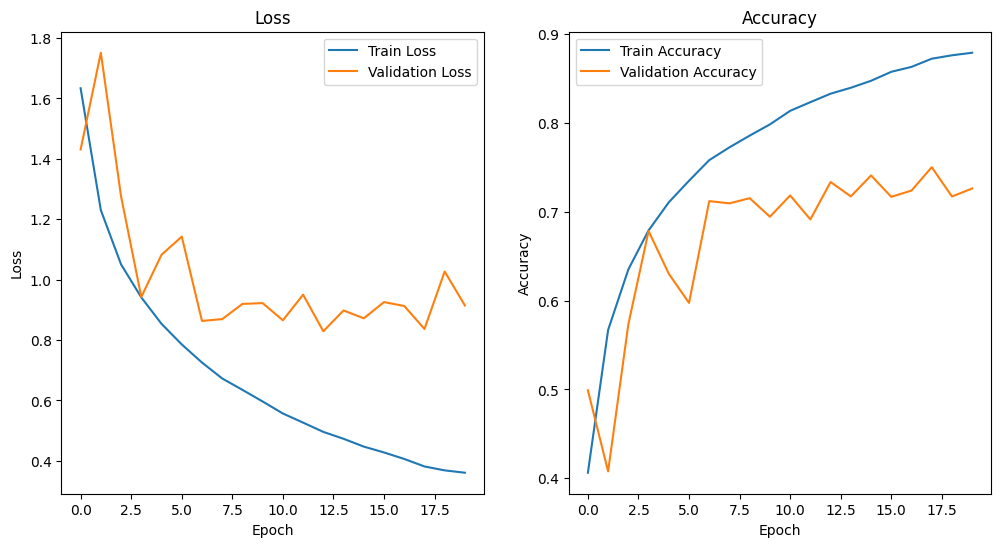

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 4ms/step


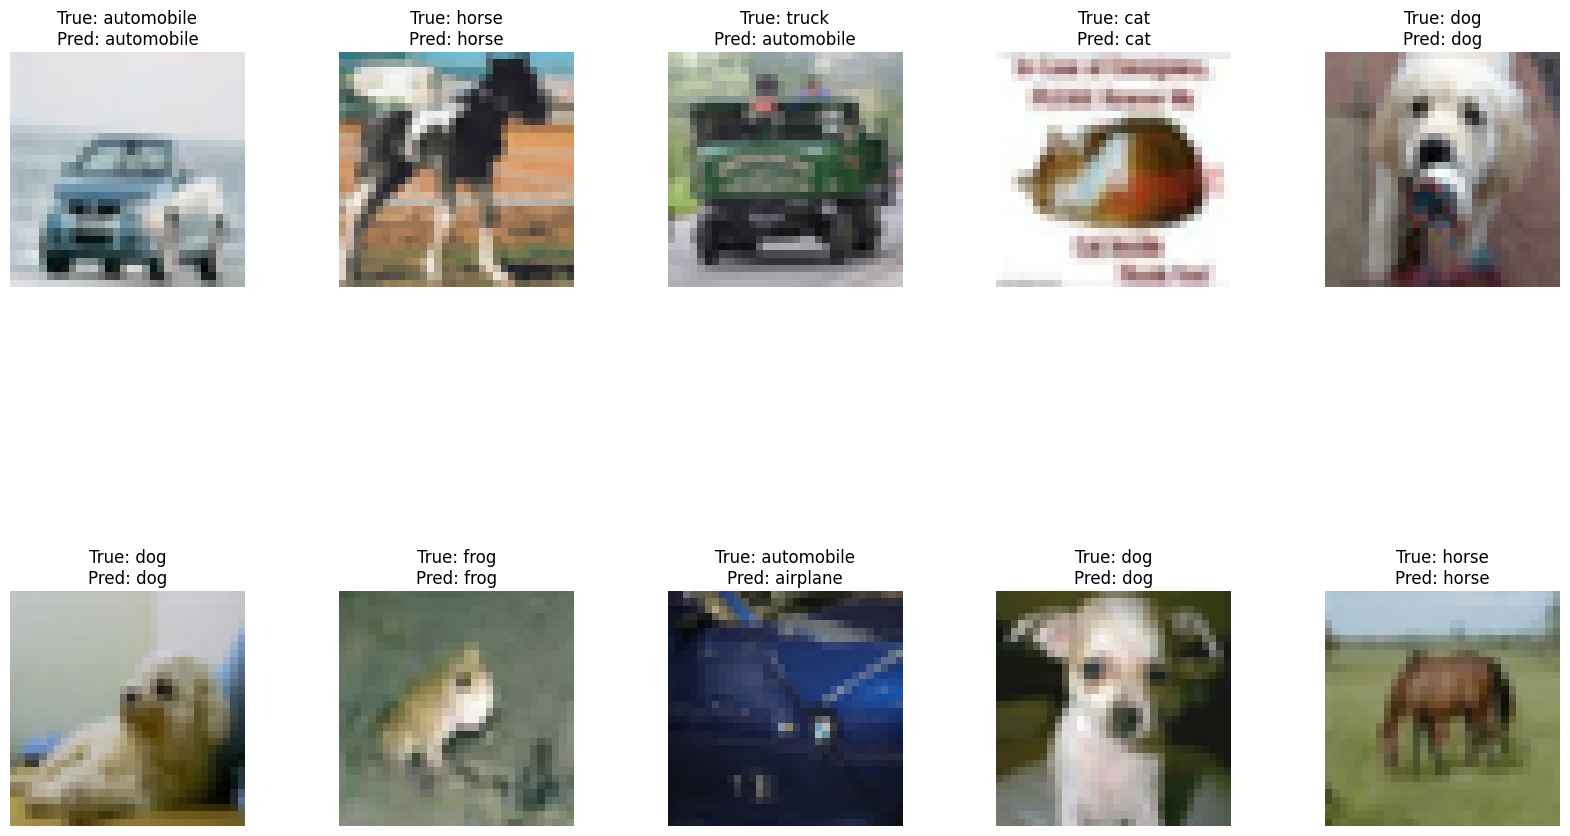

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select 10 random test samples
indices = np.random.choice(x_test.shape[0], 10)
samples = x_test[indices]
true_labels = y_test[indices].flatten()  # Flatten the labels
predictions = y_pred_classes[indices]

# Display images and predictions
plt.figure(figsize=(20, 12))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples[i])
    plt.title(f'True: {cifar10_classes[true_labels[i]]}\nPred: {cifar10_classes[predictions[i]]}')
    plt.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


## Result

In this project, we developed a Convolutional Neural Network (CNN) model using the CIFAR-10 dataset for image classification. The model achieved an impressive accuracy rate of 87% on the test set. We evaluated the model's performance by comparing the true labels with the predicted labels on a subset of test images. The results demonstrate that the model effectively classifies images into one of the ten object classes, showcasing its robustness and accuracy. The visualizations of the predictions further illustrate the model's capability to distinguish between different object categories.